# Steps
- [ ] SMART question
- [ ] Obtain data
- [ ] Analise Structure
- [ ] Separate between numeric and categorical data
- [ ] Univariate Analysis 


## SMART Question ✨
- <span style="color:red">¿Cuál es el problema que estamos tratando de resolver?</span>
  - Predicción del cáncer de pulmón en individuos basándose en una serie de *factores de riesgo*, *síntomas* y *características demográficas*. Identificar a las personas que tienen mayor riesgo de tener cáncer de pulmón puede ser vital para el diagnóstico temprano y la intervención médica, lo cual puede mejorar significativamente las tasas de supervivencia y los resultados del tratamiento.
- <span style="color:red">¿Cuál es el propósito de este análisis?</span>
  - Identificar patrones y correlaciones: Entender cómo se relacionan los diversos factores de riesgo y síntomas entre sí y con la presencia de cáncer de pulmón.
  - Desarrollo de modelos predictivos: Usar la información obtenida para crear modelos que puedan predecir con cierta precisión si un individuo tiene cáncer de pulmón basándose en sus respuestas o mediciones en las variables proporcionadas.
- <span style="color:red">¿El análisis es descriptivo o predictivo?</span>
  - El análisis puede ser ambos, descriptivo y predictivo
    - Inicialmente, puedes realizar un análisis descriptivo para entender la distribución de los datos, las tendencias, y las posibles correlaciones entre las variables
    - Posteriormente, el análisis se convierte en predictivo cuando utilizas los datos para construir modelos que intentan predecir la presencia de cáncer de pulmón en nuevos individuos basándose en las variables de entrada
- <span style="color:red">¿Qué esperamos aprender de ello?</span>
  - La importancia de cada factor de riesgo y síntoma: Cuáles son los predictores más significativos de cáncer de pulmón.
  - Patrones subyacentes: Si existen combinaciones específicas de factores que aumentan significativamente el riesgo.
  - Capacidad predictiva: La precisión con la que podemos predecir la presencia de cáncer de pulmón utilizando estos datos.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data
cancer_data = pd.read_csv('lung_cancer.csv')

In [4]:
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


- <span style="color:red">YES=2</span>
- <span style="color:red">NO=1</span>

In [5]:
#display null values and data types
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
#numerical features
numerical = [
    'AGE'
]

#categorical features
categorical = [
    'GENDER',
    'SMOKING',
    'YELLOW_FINGERS',
    'ANXIETY',
    'PEER_PRESSURE',
    'CHRONIC DISEASE',
    'FATIGUE',
    'ALLERGY',
    'WHEEZING',
    'ALCOHOL_CONSUMING',
    'COUGHING',
    'SHORTNESS_OF_BREATH',
    'SWALLOWING_DIFFICULTY',
    'CHEST_PAIN',
    'LUNG_CANCER'
]

In [14]:
#adjust column names to work better
new_columns = [
    'GENDER',
    'AGE',
    'SMOKING',
    'YELLOW_FINGERS',
    'ANXIETY',
    'PEER_PRESSURE',
    'CHRONIC DISEASE',
    'FATIGUE',
    'ALLERGY',
    'WHEEZING',
    'ALCOHOL_CONSUMING',
    'COUGHING',
    'SHORTNESS_OF_BREATH',
    'SWALLOWING_DIFFICULTY',
    'CHEST_PAIN',
    'LUNG_CANCER'
]
#change cancer_data columns to new_columns
cancer_data.columns = new_columns

In [15]:
# Look up for missing values
cancer_data.isnull()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Analize unique values for categorical features
cancer_data['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [38]:
# Convert categorical data to numerical
numeric_gender = cancer_data['GENDER'].replace({'M': 0, 'F': 1})
numeric_has_cancer = cancer_data['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})

numeric_cancer_data = cancer_data.assign(GENDER=numeric_gender, LUNG_CANCER=numeric_has_cancer)

numeric_cancer_data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


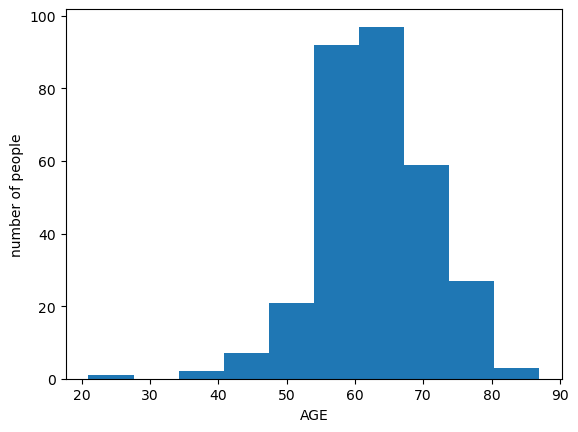

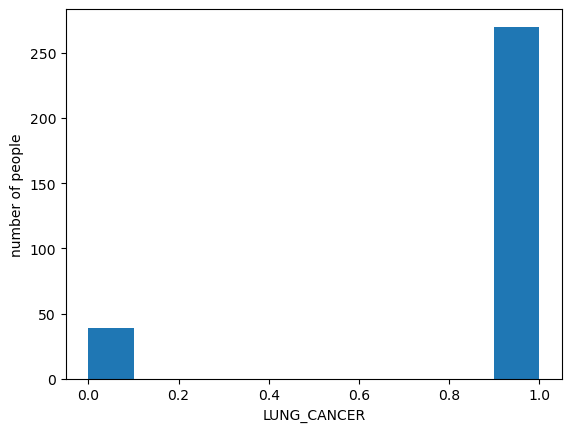

In [39]:
# Analyze the numeric values
numerical_data = ["AGE", "LUNG_CANCER"]

# AGE and LUNG_CANCER
for i in numeric_cancer_data[numerical_data].columns:
    plt.hist(numeric_cancer_data[numerical_data][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

Es desproporcionado la cantidad de personas que tiene cancer contra los que no. No es representativo.

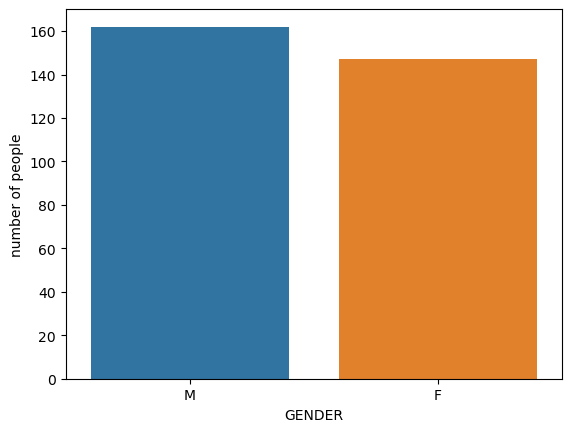

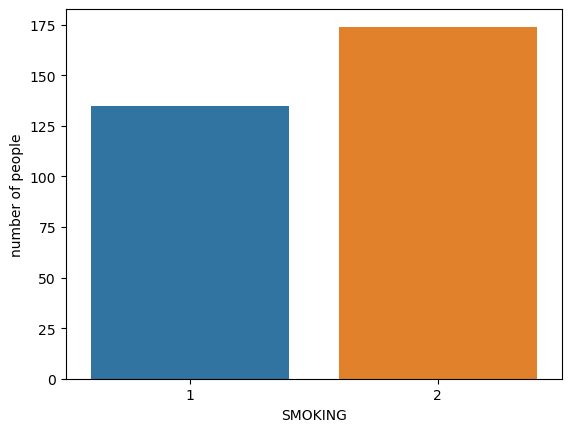

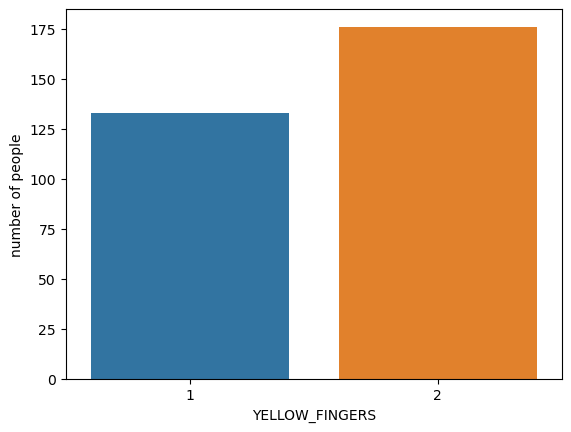

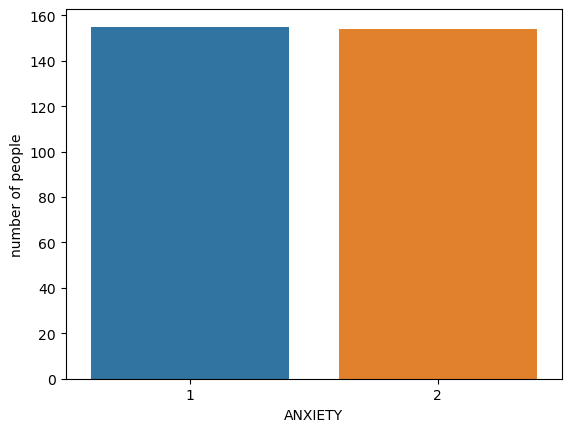

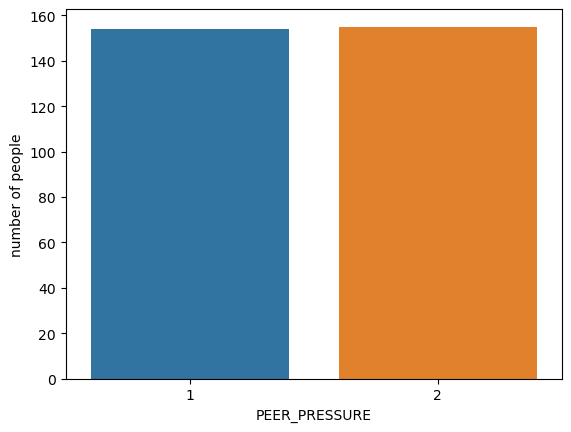

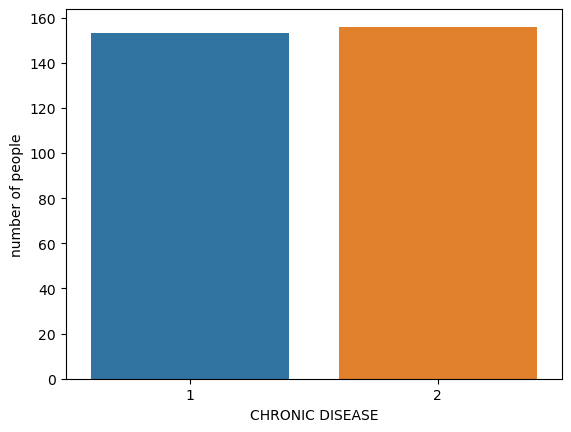

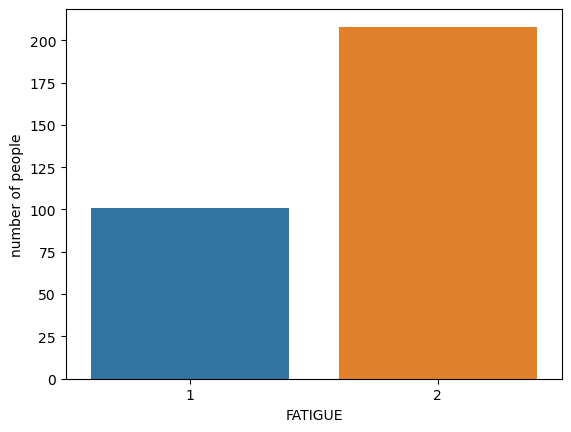

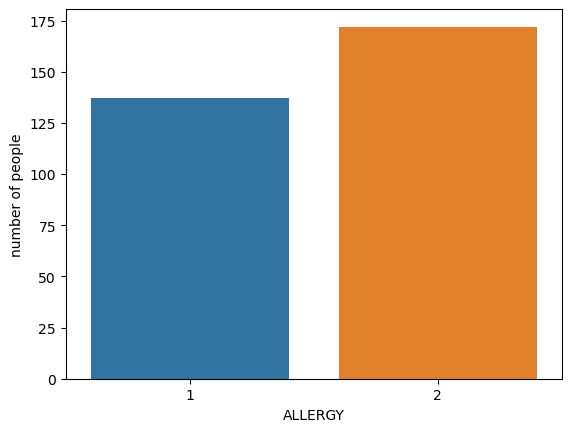

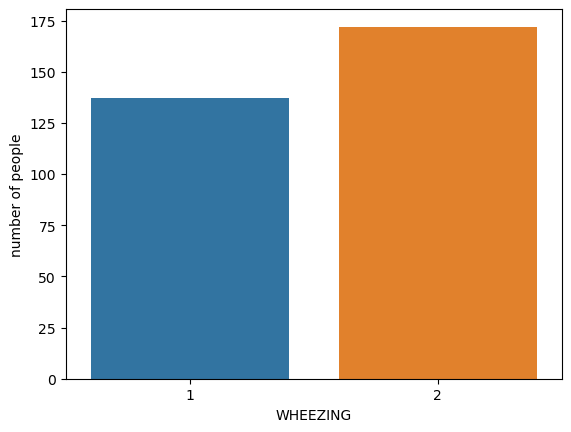

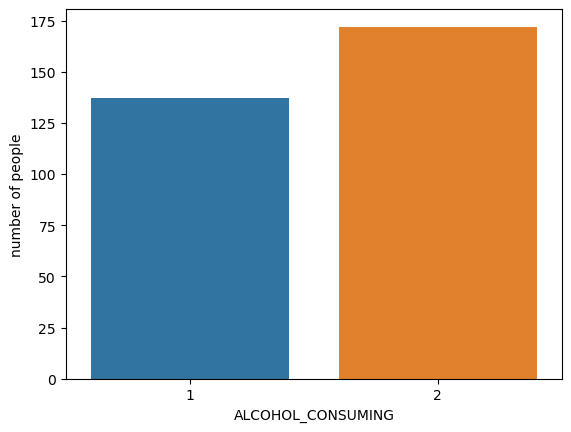

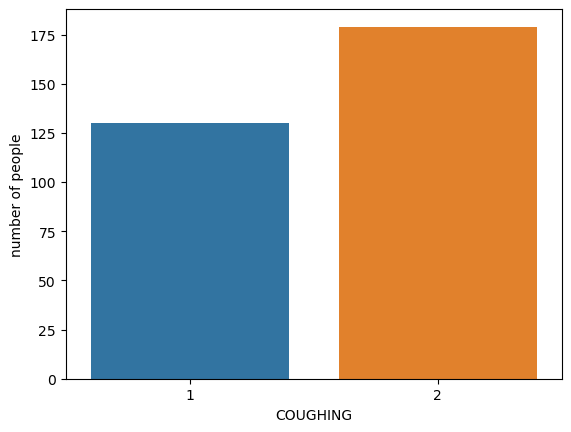

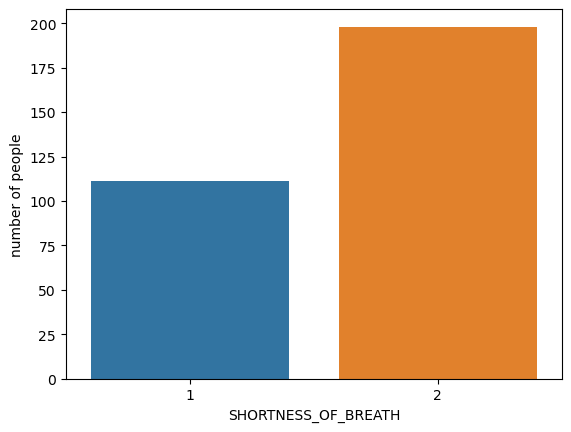

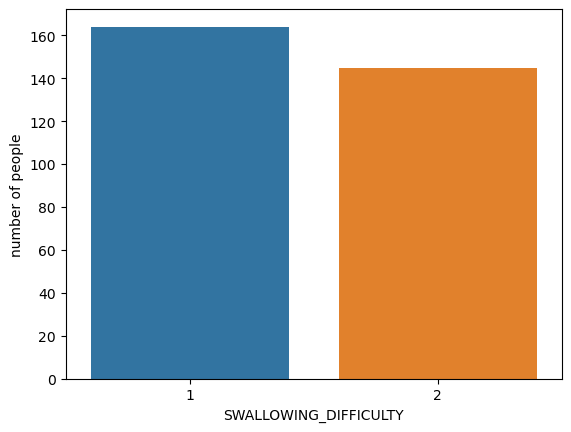

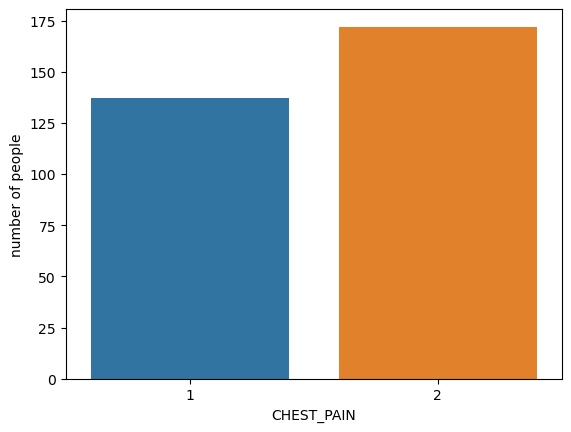

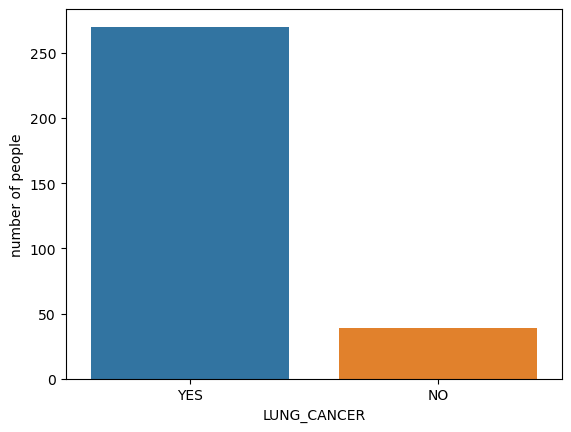

In [40]:
#look at categorical data distribution
for i in cancer_data[categorical].columns:
    sns.barplot(x=cancer_data[categorical][i].value_counts().index,y=cancer_data[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

## Análisis de correlación

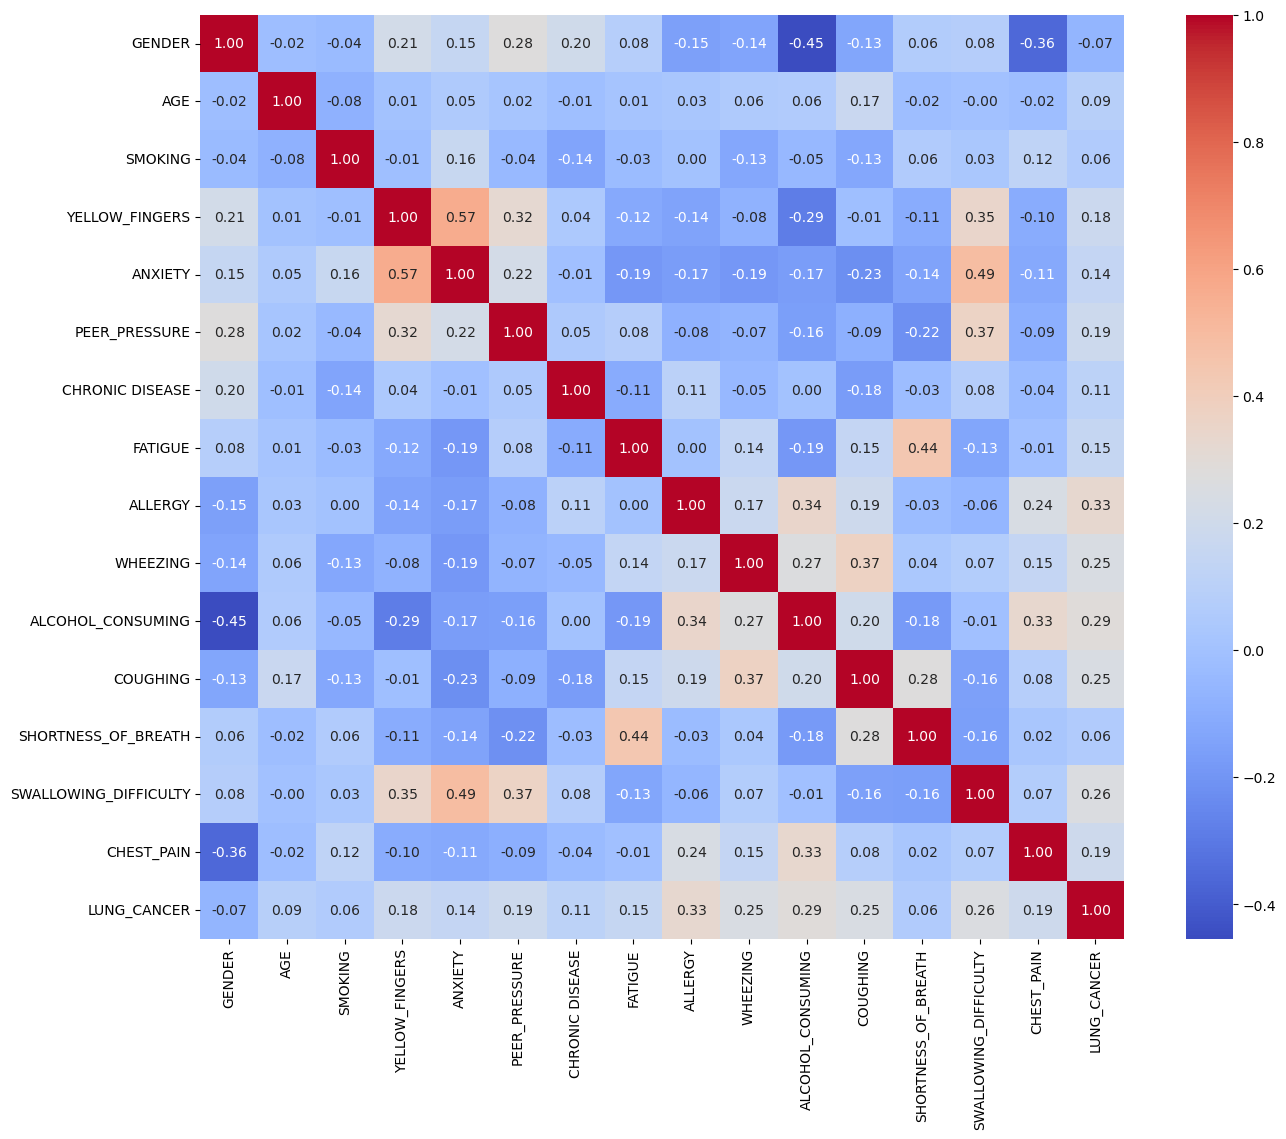

In [41]:
correlation_matrix = numeric_cancer_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

In [50]:
correlation_matrix

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,-0.021306,-0.036277,0.212959,0.152127,0.275564,0.204606,0.083560,-0.154251,-0.141207,-0.454268,-0.133303,0.064911,0.078161,-0.362958,-0.067254
AGE,-0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,-0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,-0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,-0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


In [42]:
from itertools import combinations

# Drop the last column, since is not a feature, is the result
columns = numeric_cancer_data.drop('LUNG_CANCER', axis=1).columns
# Create manually the combinations of features
combos = list(combinations(columns, 2))
correlation_pairs = correlation_matrix.stack()
# Construct the dataframe
correlation_data = []
for combo in combos:
  correlation_data.append({
    "parametter_1": combo[0],
    "parametter_2": combo[1],
    "value": correlation_pairs[combo],
  })
# Display the dataframe sorted by correlation value
pd.DataFrame(correlation_data, columns=["parametter_1", "parametter_2", "value"]).sort_values(by="value", ascending=False).head(10)

,parametter_1,parametter_2,value
39,YELLOW_FINGERS,ANXIETY,0.565829
58,ANXIETY,SWALLOWING_DIFFICULTY,0.489403
81,FATIGUE,SHORTNESS_OF_BREATH,0.441745
91,WHEEZING,COUGHING,0.374265
67,PEER_PRESSURE,SWALLOWING_DIFFICULTY,0.366590
48,YELLOW_FINGERS,SWALLOWING_DIFFICULTY,0.345904
85,ALLERGY,ALCOHOL_CONSUMING,0.344339
98,ALCOHOL_CONSUMING,CHEST_PAIN,0.331226
40,YELLOW_FINGERS,PEER_PRESSURE,0.323083
99,COUGHING,SHORTNESS_OF_BREATH,0.277385


# Clasificarion

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
X = numeric_cancer_data[['YELLOW_FINGERS', 'ANXIETY', 'SWALLOWING_DIFFICULTY', 'FATIGUE', 'PEER_PRESSURE']]
# Estado del préstamo es si o no, por lo que es un problema de clasificación binaria
y = numeric_cancer_data['LUNG_CANCER']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Model Accuracy: 0.97


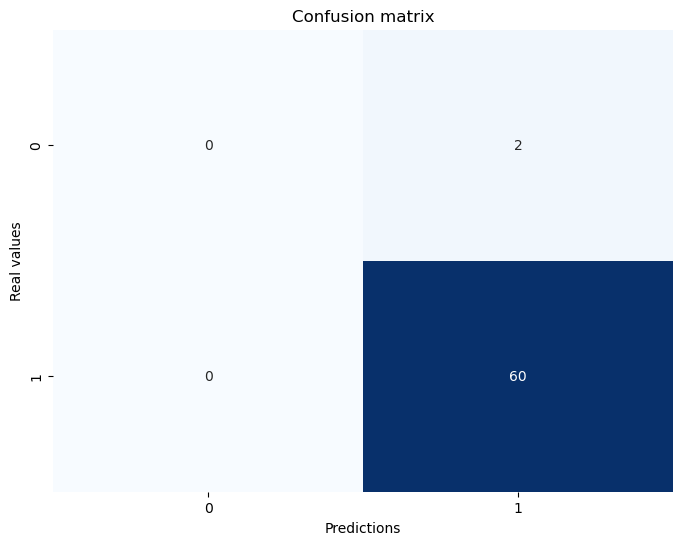


Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



/Users/danielmartinezvillegas/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielmartinezvillegas/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielmartinezvillegas/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [46]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.title('Confusion matrix')
plt.show()

classification_report_info = classification_report(y_test, y_pred)
print("\nClassification report:")
print(classification_report_info)

<span style="color:red">Para la clase 0 (no cáncer):</span> La precisión es del 0.00, lo que indica que el modelo no ha identificado correctamente ningún caso negativo (sin cáncer). Esto puede deberse a una falta de muestras de esta clase en los datos de entrenamiento o a que el modelo no ha aprendido a diferenciar bien esta clase.

Para la clase 1 (cáncer): El recall es del 1.00, lo que significa que el modelo identificó correctamente todos los verdaderos positivos (todos los casos de cáncer fueron identificados).

Para la clase 0 (no cáncer): El F1-score es del 0.00, reflejando la baja precisión y recall para esta clase.

Para la clase 1 (cáncer): El F1-score es del 0.98, indicando un muy buen equilibrio entre precisión y recall para la detección de cáncer.

## Conclusiones
- El modelo ha aprendido a predecir muy bien la presencia de cáncer, posiblemente a costa de ignorar las características que definirían la ausencia de cáncer. Esto es un indicativo de que el modelo podría estar sobreajustado a la clase mayoritaria.
- Presneta un desequilibrio significativo. 

In [49]:
cancer_data['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64